# EDA 1 - Exploração Simples

Nessa rápida exploração de dados, o objetivo é obter rápidas informações sobre a Coletânea de Hinos da Igreja Cristã Maranata (ICM) - Edição 2018.

Como descrito na própria coletânea:
> Os hinos e louvores, editados nesta Coletânea, englobam partes de outras edições já publicadas que expressam gratidão, adoração e louvor ao nosso Deus, entoados em todas épocas vividas pela Igreja Fiel, momento também comemorado pela Igreja Cristã Maranata em seus cinquenta anos de existência. 

## Origem dos dados

A extração de dados para construção da base tem por origem slides oficiais disponibilizados pelo Departamento de Louvor da ICM. Todo processo de extração está descrito no notebook `pptx_txt_json.ipynb`, neste mesmo repositório.

Até o momento desta análise, os dados estão salvos em uma base de dados SQLite.



In [1]:
from sqlalchemy import create_engine

# Create an engine to the SQLite database
engine = create_engine("sqlite:///assets//database.db")

# Connect to the database
connection = engine.connect()
connection

In [2]:
import pandas as pd

sql_query = """
select
    numero,
    nome,
    texto,
    texto_limpo,
    categoria_id,
    c.descricao as categoria
from 
    hino
    left join categoria c on c.id = categoria_id
where
    coletanea_id = 1
"""

hinos_analise = pd.read_sql_query(sql_query, connection)
hinos_analise

,numero,nome,texto,texto_limpo,categoria_id,categoria
0,01,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR
1,02,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR
2,03,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR
3,04,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR
4,05,CLAMANDO ESTOU,"CLAMANDO ESTOU, Ó MEU JESUS,\nPOR TEU SANGUE R...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR
...,...,...,...,...,...,...
790,791,EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS
791,792,LOUVANDO A DEUS,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS
792,793,MESA PREPARADA,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS
793,794,JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO.\nE...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS


In [3]:
hinos_analise.loc[hinos_analise["numero"] == "null", "numero"] = 0
hinos_analise["numero_int"] = hinos_analise["numero"].astype(int)
hinos_analise = (
    hinos_analise.drop(columns=["numero"])
    .rename(columns={"numero_int": "numero"})
    .sort_values("numero")
)
hinos_analise

,nome,texto,texto_limpo,categoria_id,categoria,numero
794,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,0
0,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1
1,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2
2,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3
3,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4
...,...,...,...,...,...,...
789,AQUELE QUE HABITA NO ESCONDERIJO,AQUELE QUE HABITA\nNO ESCONDERIJO DO ALTÍSSIMO...,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,11,CORINHOS,790
790,EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. \nEU QUERO MAI...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791
791,LOUVANDO A DEUS,LOUVANDO A DEUS \nE CAINDO NA GRAÇA DE TODO O ...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792
792,MESA PREPARADA,"MESA PREPARADA, CABEÇA UNGIDA,\nCÁLICE TRANSBO...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793


In [4]:
# save to json and pickle
hinos_analise[["numero", "nome", "texto", "categoria"]].to_json(
    "assets/hinos_icm.json", orient="records", force_ascii=False, indent=4, index=False
)
hinos_analise.to_pickle("assets/hinos_analise.pkl")

795 louvores ao todo.

## Categorias

In [5]:
categorias_count = (
    hinos_analise[["categoria_id", "categoria", "numero"]]
    .groupby(["categoria_id", "categoria"])
    .count()
    .reset_index()
    .rename(columns={"numero": "contagem"})
)
categorias_count["categoria_abr"] = categorias_count["categoria"].apply(
    lambda x: x[:13] + "..." if len(x) > 15 else x
)
categorias_count

,categoria_id,categoria,contagem,categoria_abr
0,1,CLAMOR,57,CLAMOR
1,2,INVOCAÇÃO E COMUNHÃO,40,INVOCAÇÃO E C...
2,3,DEDICAÇÃO,104,DEDICAÇÃO
3,4,"MORTE, RESSURREIÇÃO E SALVAÇÃO",94,"MORTE, RESSUR..."
4,5,CONSOLO E ENCORAJAMENTO,91,CONSOLO E ENC...
5,6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,92,SANTIFICAÇÃO ...
6,7,VOLTA DE JESUS E ETERNIDADE,94,VOLTA DE JESU...
7,8,LOUVOR,78,LOUVOR
8,9,SALMOS DE LOUVOR,16,SALMOS DE LOU...
9,10,GRUPO DE LOUVOR,65,GRUPO DE LOUVOR


' sns.barplot(\n    x="contagem",\n    y="categoria_abr",\n    data=categorias_count.sort_values(by="contagem", ascending=False),\n    ax=axs[1],\n) '

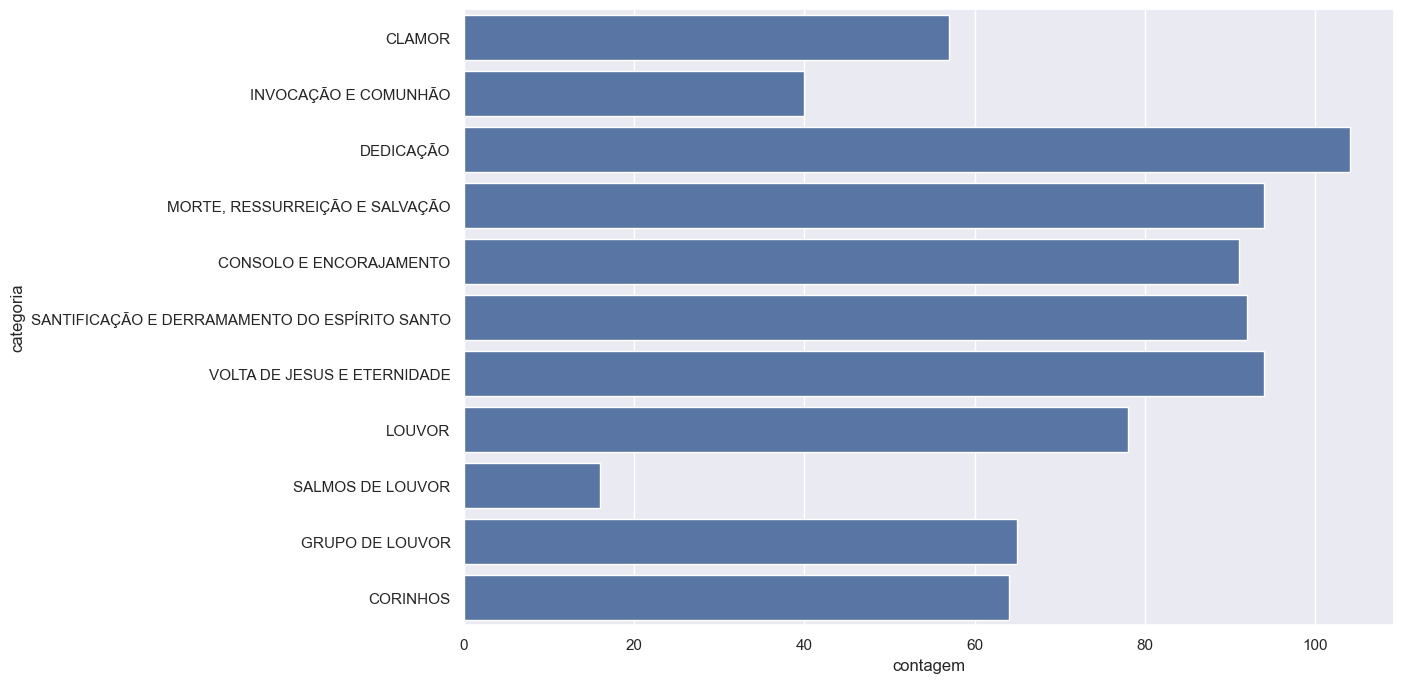

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


f, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x="contagem", y="categoria", data=categorias_count, ax=axs)
""" sns.barplot(
    x="contagem",
    y="categoria_abr",
    data=categorias_count.sort_values(by="contagem", ascending=False),
    ax=axs[1],
) """